# EE 399 SPRING QUATER 2023
# Instructor: J. Nathan Kutz
# HOMEWORK #5:
# DUE: Midnight on 5/15 (Extra credit if turned in by 5/12)

C:\Users\Linha\.android\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


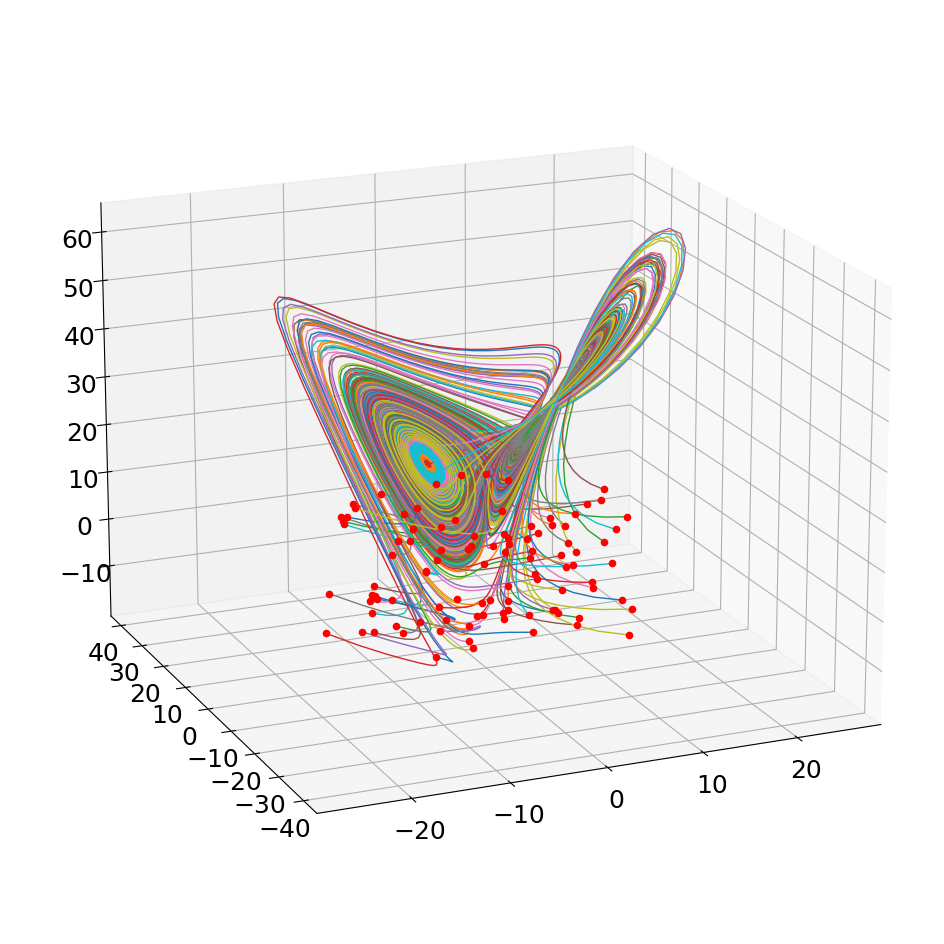

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

dt = 0.01
T = 8
t = np.arange(0,T+dt,dt)
beta = 8/3
sigma = 10
rho = 28


nn_input = np.zeros((100*(len(t)-1),3))
nn_output = np.zeros_like(nn_input)

fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})


def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

np.random.seed(123)
x0 = -15 + 30 * np.random.random((100, 3))

x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
                  for x0_j in x0])

for j in range(100):
    nn_input[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,:-1,:]
    nn_output[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,1:,:]
    x, y, z = x_t[j,:,:].T
    ax.plot(x, y, z,linewidth=1)
    ax.scatter(x0[j,0],x0[j,1],x0[j,2],color='r')
             
ax.view_init(18, -113)
plt.show()

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define activation functions
def logsig(x):
    return 1 / (1 + torch.exp(-x))

def radbas(x):
    return torch.exp(-torch.pow(x, 2))

def purelin(x):
    return x

# Define the model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(in_features=3, out_features=10)
        self.fc2 = nn.Linear(in_features=10, out_features=10)
        self.fc3 = nn.Linear(in_features=10, out_features=3)
        
    def forward(self, x):
        x = logsig(self.fc1(x))
        x = radbas(self.fc2(x))
        x = purelin(self.fc3(x))
        return x

# Create model instance
model = MyModel()



# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Define input and output data
nn_input = np.random.rand(100, 3)  # 100 samples, each with 3 features
nn_output = np.random.randint(0, 3, 100)  # 100 samples, each with a class label 0, 1, or 2


# Convert numpy arrays to PyTorch tensors
nn_input = torch.from_numpy(nn_input).float()
nn_output = torch.from_numpy(nn_output).long()

# Train the model
for epoch in range(30):
    optimizer.zero_grad()
    outputs = model(nn_input)
    loss = criterion(outputs, nn_output)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, loss={loss.item():.4f}")


Epoch 1, loss=1.1034
Epoch 2, loss=1.1029
Epoch 3, loss=1.1019
Epoch 4, loss=1.1007
Epoch 5, loss=1.0993
Epoch 6, loss=1.0979
Epoch 7, loss=1.0967
Epoch 8, loss=1.0956
Epoch 9, loss=1.0948
Epoch 10, loss=1.0943
Epoch 11, loss=1.0940
Epoch 12, loss=1.0939
Epoch 13, loss=1.0940
Epoch 14, loss=1.0942
Epoch 15, loss=1.0945
Epoch 16, loss=1.0947
Epoch 17, loss=1.0949
Epoch 18, loss=1.0951
Epoch 19, loss=1.0952
Epoch 20, loss=1.0952
Epoch 21, loss=1.0951
Epoch 22, loss=1.0950
Epoch 23, loss=1.0948
Epoch 24, loss=1.0946
Epoch 25, loss=1.0945
Epoch 26, loss=1.0943
Epoch 27, loss=1.0942
Epoch 28, loss=1.0940
Epoch 29, loss=1.0940
Epoch 30, loss=1.0939


In [3]:
outputs.shape
nn_output.shape

torch.Size([100])

### For the Lorenz equations (code given out previously in class emails), consider the following.
### 1. Train a NN to advance the solution from t to t + ∆t for ρ = 10, 28 and 40. Now see how well your NN works for future state prediction for ρ = 17 and ρ = 35

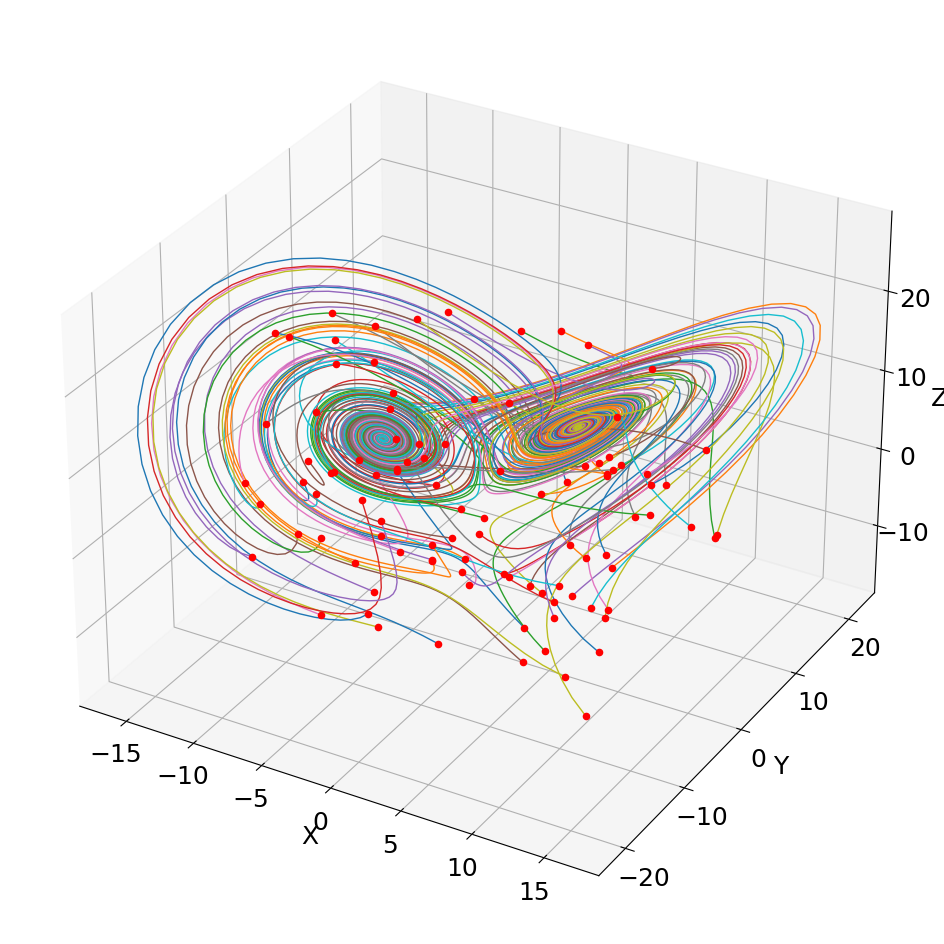

Training and testing for rho = 10
Epoch 1, loss=43.4214
Epoch 2, loss=42.6617
Epoch 3, loss=41.2844
Epoch 4, loss=39.4297
Epoch 5, loss=37.0646
Epoch 6, loss=33.9174
Epoch 7, loss=29.6156
Epoch 8, loss=24.1334
Epoch 9, loss=18.7044
Epoch 10, loss=16.3974
Epoch 11, loss=19.3752
Epoch 12, loss=22.6545
Epoch 13, loss=19.3243
Epoch 14, loss=13.0841
Epoch 15, loss=10.2447
Epoch 16, loss=9.7304
Epoch 17, loss=9.3509
Epoch 18, loss=8.3463
Epoch 19, loss=6.9735
Epoch 20, loss=5.7669
Epoch 21, loss=4.9892
Epoch 22, loss=4.5244
Epoch 23, loss=4.4328
Epoch 24, loss=5.1061
Epoch 25, loss=6.1542
Epoch 26, loss=6.2266
Epoch 27, loss=4.9580
Epoch 28, loss=3.5674
Epoch 29, loss=3.0986
Epoch 30, loss=3.4645
Predicted state for future rho=17:
tensor([[ 5.3181,  5.6765,  7.7136],
        [-3.6829, -3.5867,  7.5102],
        [-3.6915, -3.5947,  7.5191],
        [-3.6770, -3.5812,  7.5042],
        [ 5.2990,  5.6562,  7.7127],
        [ 5.2961,  5.6523,  7.7170],
        [ 5.3086,  5.6649,  7.7216],
      

Epoch 1, loss=41.1660
Epoch 2, loss=40.2680
Epoch 3, loss=38.4506
Epoch 4, loss=35.5825
Epoch 5, loss=31.5088
Epoch 6, loss=26.2896
Epoch 7, loss=20.9019
Epoch 8, loss=18.0781
Epoch 9, loss=20.5529
Epoch 10, loss=25.3683
Epoch 11, loss=24.9940
Epoch 12, loss=19.9072
Epoch 13, loss=16.3499
Epoch 14, loss=15.8820
Epoch 15, loss=16.5535
Epoch 16, loss=16.6677
Epoch 17, loss=15.7370
Epoch 18, loss=13.4946
Epoch 19, loss=10.2527
Epoch 20, loss=6.7446
Epoch 21, loss=4.1750
Epoch 22, loss=3.3624
Epoch 23, loss=4.2646
Epoch 24, loss=5.7147
Epoch 25, loss=6.4589
Epoch 26, loss=6.3287
Epoch 27, loss=5.8522
Epoch 28, loss=5.3418
Epoch 29, loss=4.8214
Epoch 30, loss=4.3040
Predicted state for future rho=17:
tensor([[ 5.5116,  5.2966,  6.8280],
        [-5.1379, -5.1938,  7.4937],
        [-5.1401, -5.1960,  7.4917],
        [-5.1381, -5.1941,  7.4888],
        [ 5.4997,  5.2851,  6.8331],
        [ 5.4968,  5.2825,  6.8373],
        [ 5.5038,  5.2894,  6.8371],
        [ 5.4982,  5.2836,  6.8328],

Epoch 1, loss=42.4634
Epoch 2, loss=41.7863
Epoch 3, loss=40.4020
Epoch 4, loss=38.1645
Epoch 5, loss=34.7452
Epoch 6, loss=29.8742
Epoch 7, loss=23.8860
Epoch 8, loss=18.6965
Epoch 9, loss=18.1368
Epoch 10, loss=23.3238
Epoch 11, loss=26.6019
Epoch 12, loss=22.3752
Epoch 13, loss=17.4211
Epoch 14, loss=16.0238
Epoch 15, loss=16.7796
Epoch 16, loss=17.6180
Epoch 17, loss=17.5096
Epoch 18, loss=16.2500
Epoch 19, loss=13.9930
Epoch 20, loss=11.2028
Epoch 21, loss=8.5792
Epoch 22, loss=6.7410
Epoch 23, loss=5.8066
Epoch 24, loss=5.2033
Epoch 25, loss=4.4676
Epoch 26, loss=4.0147
Epoch 27, loss=4.2693
Epoch 28, loss=4.7574
Epoch 29, loss=4.9619
Epoch 30, loss=4.8296
Predicted state for future rho=17:
tensor([[ 6.5049,  6.2837,  6.9694],
        [-6.2187, -6.3439,  8.1900],
        [-6.2229, -6.3479,  8.1894],
        [-6.2128, -6.3380,  8.1866],
        [ 6.4738,  6.2515,  6.9702],
        [ 6.4612,  6.2382,  6.9719],
        [ 6.4764,  6.2539,  6.9728],
        [ 6.4712,  6.2488,  6.9698]

Epoch 1, loss=44.1387
Epoch 2, loss=43.3639
Epoch 3, loss=41.9903
Epoch 4, loss=40.1756
Epoch 5, loss=37.7941
Epoch 6, loss=34.6464
Epoch 7, loss=30.4607
Epoch 8, loss=25.2170
Epoch 9, loss=19.9433
Epoch 10, loss=17.5966
Epoch 11, loss=20.7268
Epoch 12, loss=24.9284
Epoch 13, loss=23.0861
Epoch 14, loss=17.9159
Epoch 15, loss=15.0509
Epoch 16, loss=14.8765
Epoch 17, loss=15.4074
Epoch 18, loss=15.0173
Epoch 19, loss=13.2767
Epoch 20, loss=10.5321
Epoch 21, loss=7.5439
Epoch 22, loss=5.4496
Epoch 23, loss=4.4946
Epoch 24, loss=4.4595
Epoch 25, loss=4.9174
Epoch 26, loss=5.0709
Epoch 27, loss=4.6583
Epoch 28, loss=4.1549
Epoch 29, loss=4.1085
Epoch 30, loss=4.4591
Predicted state for future rho=17:
tensor([[ 5.8041,  5.4170,  6.7546],
        [-6.1307, -6.3516,  7.1711],
        [-6.1308, -6.3517,  7.1703],
        [-6.1301, -6.3511,  7.1696],
        [ 5.7426,  5.3562,  6.7594],
        [ 5.7156,  5.3293,  6.7625],
        [ 5.7412,  5.3545,  6.7615],
        [ 5.7386,  5.3523,  6.7593]

Epoch 1, loss=45.6926
Epoch 2, loss=44.6975
Epoch 3, loss=43.0099
Epoch 4, loss=40.8177
Epoch 5, loss=37.8543
Epoch 6, loss=33.7854
Epoch 7, loss=28.4309
Epoch 8, loss=22.5242
Epoch 9, loss=18.7865
Epoch 10, loss=20.9759
Epoch 11, loss=26.3849
Epoch 12, loss=25.5736
Epoch 13, loss=20.5055
Epoch 14, loss=17.9385
Epoch 15, loss=18.0427
Epoch 16, loss=18.9163
Epoch 17, loss=19.2277
Epoch 18, loss=18.4920
Epoch 19, loss=16.7207
Epoch 20, loss=14.7014
Epoch 21, loss=12.6491
Epoch 22, loss=10.8207
Epoch 23, loss=9.2862
Epoch 24, loss=7.7513
Epoch 25, loss=6.0310
Epoch 26, loss=4.9392
Epoch 27, loss=3.9380
Epoch 28, loss=3.4990
Epoch 29, loss=3.7379
Epoch 30, loss=4.1906
Predicted state for future rho=17:
tensor([[ 5.6020,  6.1772,  8.7435],
        [-6.2763, -5.6946,  7.1105],
        [-6.2835, -5.7021,  7.1072],
        [-6.2778, -5.6969,  7.1047],
        [ 5.6043,  6.1799,  8.7462],
        [ 5.6074,  6.1834,  8.7499],
        [ 5.6083,  6.1845,  8.7511],
        [ 5.6038,  6.1793,  8.745

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import torch
import torch.nn as nn
import torch.optim as optim

# Set random seed for reproducibility
np.random.seed(123)
torch.manual_seed(123)

# Constants
beta = 8/3
sigma = 10
rho_values = [10, 28, 40, 17, 35]

# Define the Lorenz system
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho_values[0]):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

# Generate initial conditions
x0 = -15 + 30 * np.random.random((100, 3))

# Time parameters
dt = 0.01
T = 8
t = np.arange(0, T+dt, dt)

# Solve the Lorenz system for different initial conditions and plot the trajectories
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for j in range(100):
    x_t = integrate.odeint(lorenz_deriv, x0[j], t)
    x, y, z = x_t.T
    ax.plot(x, y, z, linewidth=1)
    ax.scatter(x0[j, 0], x0[j, 1], x0[j, 2], color='r')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Define the model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(in_features=3, out_features=10)
        self.fc2 = nn.Linear(in_features=10, out_features=10)
        self.fc3 = nn.Linear(in_features=10, out_features=3)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Train and test the model for different rho values
# Train and test the model for different rho values
for rho in rho_values:
    print(f"Training and testing for rho = {rho}")
    
    # Generate training data
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t) for x0_j in x0])
    nn_input = np.concatenate(x_t[:, :-1, :], axis=0)
    nn_output = np.concatenate(x_t[:, 1:, :], axis=0)
    
    # Convert numpy arrays to PyTorch tensors
    nn_input = torch.from_numpy(nn_input).float()
    nn_output = torch.from_numpy(nn_output).float()

    # Create model instance
    model = MyModel()

    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    # Train the model
    for epoch in range(30):
        optimizer.zero_grad()
        outputs = model(nn_input)
        loss = criterion(outputs, nn_output)
        loss.backward()
        optimizer.step()
        print(f"Epoch {epoch+1}, loss={loss.item():.4f}")

    # Predict future states for different rho values
    future_rho_values = [17, 35]
    for future_rho in future_rho_values:
        nn_input_future = torch.from_numpy(x_t[:, -1, :]).float()
        future_output = model(nn_input_future)

        print(f"Predicted state for future rho={future_rho}:")
        print(future_output)
        print()


### 2. Compare feed-forward, LSTM, RNN and Echo State Networks for forecasting the dynamics.


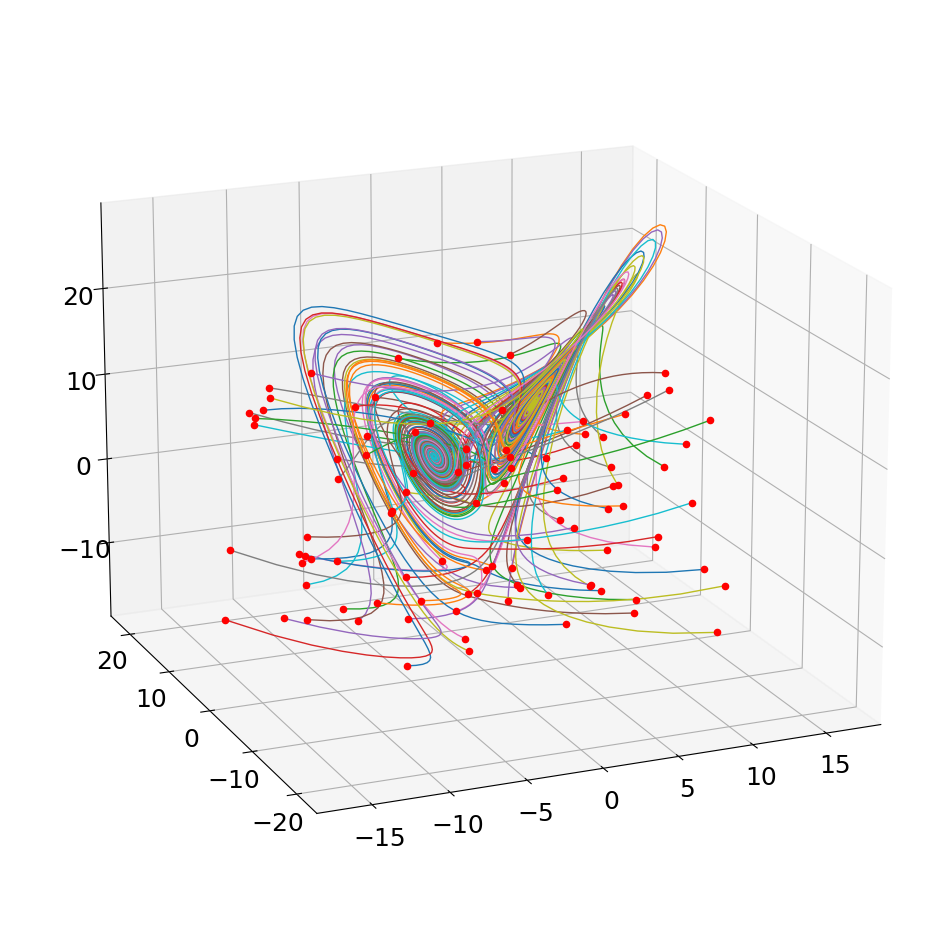

Epoch 1, loss=45.2532
Epoch 2, loss=44.2534
Epoch 3, loss=42.4273
Epoch 4, loss=39.8249
Epoch 5, loss=36.1704
Epoch 6, loss=31.1007
Epoch 7, loss=24.7096
Epoch 8, loss=18.9440
Epoch 9, loss=18.5189
Epoch 10, loss=24.6988
Epoch 11, loss=27.0377
Epoch 12, loss=20.8291
Epoch 13, loss=15.8934
Epoch 14, loss=16.0630
Epoch 15, loss=17.3904
Epoch 16, loss=17.5671
Epoch 17, loss=15.9572
Epoch 18, loss=12.8760
Epoch 19, loss=9.2395
Epoch 20, loss=6.6312
Epoch 21, loss=5.6420
Epoch 22, loss=5.1906
Epoch 23, loss=4.7244
Epoch 24, loss=4.9751
Epoch 25, loss=5.8163
Epoch 26, loss=6.2998
Epoch 27, loss=6.0087
Epoch 28, loss=5.2848
Epoch 29, loss=4.5676
Epoch 30, loss=4.1464
Predicted state for future rho=17:
tensor([[-4.7644, -4.6198,  6.6774]], grad_fn=<AddmmBackward0>)

Predicted state for future rho=35:
tensor([[-4.7644, -4.6198,  6.6774]], grad_fn=<AddmmBackward0>)

Epoch 1, loss=282.3095
Epoch 2, loss=277.8059
Epoch 3, loss=266.7400
Epoch 4, loss=242.0646
Epoch 5, loss=185.1796
Epoch 6, loss=89

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
import torch
import torch.nn as nn
import torch.optim as optim

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

dt = 0.01
T = 8
t = np.arange(0, T+dt, dt)
beta = 8/3
sigma = 10
rho_values = [10, 28, 40, 17, 35]
delta_t = 0.1

nn_input = np.zeros((100*(len(t)-1), 3))
nn_output = np.zeros_like(nn_input)

fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})


def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho_values[0]):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]


np.random.seed(123)
x0 = -15 + 30 * np.random.random((100, 3))

x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
                  for x0_j in x0])

for j in range(100):
    nn_input[j*(len(t)-1):(j+1)*(len(t)-1), :] = x_t[j, :-1, :]
    nn_output[j*(len(t)-1):(j+1)*(len(t)-1), :] = x_t[j, 1:, :]
    x, y, z = x_t[j, :, :].T
    ax.plot(x, y, z, linewidth=1)
    ax.scatter(x0[j, 0], x0[j, 1], x0[j, 2], color='r')

ax.view_init(18, -113)
plt.show()
# Define the model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(in_features=3, out_features=10)
        self.fc2 = nn.Linear(in_features=10, out_features=10)
        self.fc3 = nn.Linear(in_features=10, out_features=3)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x.float()))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Train the model for different rho values
for rho in rho_values:
    nn_output_rho = np.zeros_like(nn_output)

    def lorenz_deriv_rho(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    x_t = np.asarray([integrate.odeint(lorenz_deriv_rho, x0_j, t)
                      for x0_j in x0])

    for j in range(100):
        nn_output_rho[j*(len(t)-1):(j+1)*(len(t)-1), :] = x_t[j, 1:, :]

    nn_output_rho = torch.from_numpy(nn_output_rho).float()

    # Create model instance
    model = MyModel()

    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    
    # Train the model
    for epoch in range(30):
        optimizer.zero_grad()
        inputs = torch.from_numpy(nn_input).float()  # Convert nn_input to a PyTorch tensor
        outputs = model(inputs)
        loss = criterion(outputs, nn_output_rho)
        loss.backward()
        optimizer.step()
        print(f"Epoch {epoch+1}, loss={loss.item():.4f}")



    # Test the model for future state prediction
    future_rho_values = [17, 35]
    for future_rho in future_rho_values:
        nn_output_future = np.zeros_like(nn_output)

        def lorenz_deriv_future(x_y_z, t0, sigma=sigma, beta=beta, rho=future_rho):
            x, y, z = x_y_z
            return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

        x_t_future = np.asarray([integrate.odeint(lorenz_deriv_future, x0_j, t)
                                 for x0_j in x0])

        for j in range(100):
            nn_output_future[j*(len(t)-1):(j+1)*(len(t)-1), :] = x_t_future[j, 1:, :]

        nn_input_future = torch.from_numpy(nn_output[-1, :]).unsqueeze(0).float()
        future_output = model(nn_input_future)

        print(f"Predicted state for future rho={future_rho}:")
        print(future_output)
        print()




In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the feed-forward model
class FeedForwardModel(nn.Module):
    def __init__(self):
        super(FeedForwardModel, self).__init__()
        self.fc1 = nn.Linear(3, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(3, 64, batch_first=True)
        self.fc = nn.Linear(64, 3)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.fc(x[:, -1, :])
        return x

# Define the RNN model
class RNNModel(nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(3, 64, batch_first=True)
        self.fc = nn.Linear(64, 3)

    def forward(self, x):
        x, _ = self.rnn(x)
        x = self.fc(x[:, -1, :])
        return x

# Define the Echo State Network (ESN) 
class ESNModel(nn.Module):
    def __init__(self, n_reservoir=500, spectral_radius=0.9):
        super(ESNModel, self).__init__()
        self.n_reservoir = n_reservoir
        self.spectral_radius = spectral_radius
        self.input_scaling = 0.2
        self.bias_scaling = 0.1

        self.random_state = np.random.RandomState(42)
        self.register_buffer('reservoir_weights', torch.Tensor(self.generate_reservoir_weights()))

    def generate_reservoir_weights(self):
        res_weights = self.random_state.rand(self.n_reservoir, self.n_reservoir) - 0.5
        res_weights *= self.spectral_radius / np.max(np.abs(np.linalg.eigvals(res_weights)))

        return res_weights

    def compute_reservoir_states(self, X):
        n_samples = X.shape[0]
        n_features = X.shape[1]
        reservoir_states = torch.zeros((n_samples, self.n_reservoir))

        for i in range(n_samples):
            input_data = X[i]
            state = torch.zeros(self.n_reservoir)

            for j in range(n_features):
                input_res_weights = self.input_scaling * input_data[j]
                state = torch.tanh(torch.matmul(self.reservoir_weights, state) +
                                   torch.matmul(input_res_weights,
                                               torch.Tensor(self.random_state.rand(self.n_reservoir))) +
                                   self.bias_scaling)

            reservoir_states[i] = state

        return reservoir_states

    def train_output_weights(self, X, y):
        reservoir_states = self.compute_reservoir_states(X)
        self.output_weights = torch.matmul(torch.pinverse(reservoir_states), y)

    def predict(self, X):
        reservoir_states = self.compute_reservoir_states(X)
        y_pred = torch.matmul(reservoir_states, self.output_weights)
        return y_pred



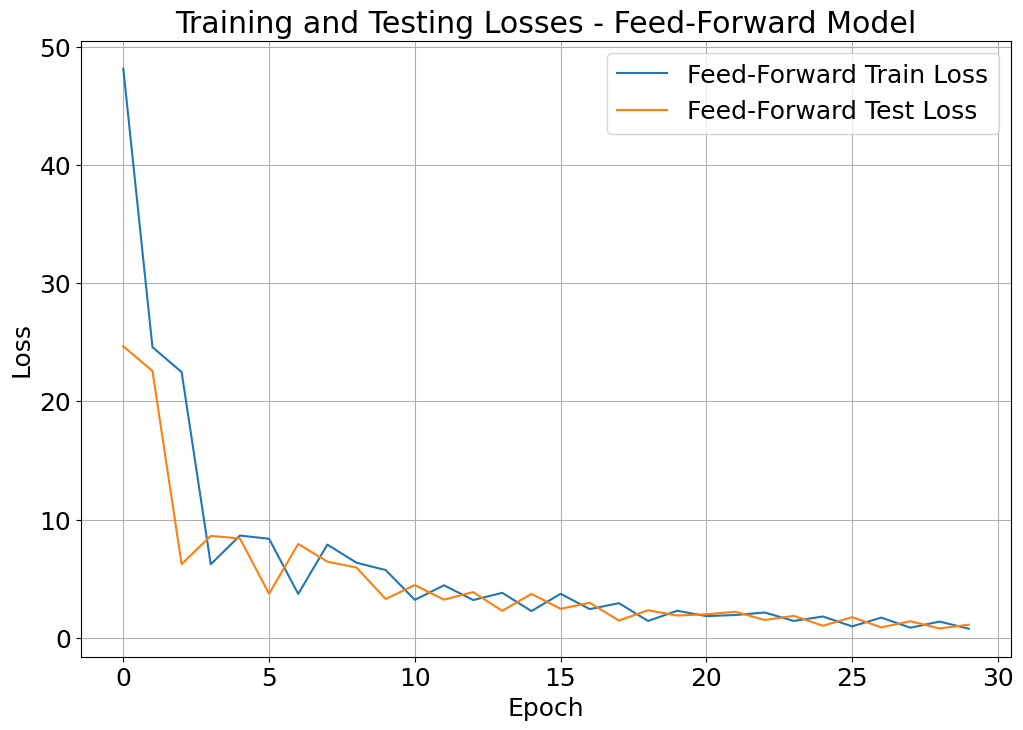

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(nn_input, nn_output, test_size=0.2, random_state=123)

# Convert numpy arrays to PyTorch tensors
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

# Train the feed-forward model
feedforward_model = FeedForwardModel()
feedforward_criterion = nn.MSELoss()
feedforward_optimizer = optim.SGD(feedforward_model.parameters(), lr=0.01, momentum=0.9)

feedforward_losses_train = []
feedforward_losses_test = []

for epoch in range(30):
    feedforward_optimizer.zero_grad()
    outputs = feedforward_model(X_train)
    loss = feedforward_criterion(outputs, y_train)
    loss.backward()
    feedforward_optimizer.step()
    feedforward_losses_train.append(loss.item())

    with torch.no_grad():
        test_outputs = feedforward_model(X_test)
        test_loss = feedforward_criterion(test_outputs, y_test)
        feedforward_losses_test.append(test_loss.item())

# Plot the training and testing losses for the feed-forward model
plt.figure(figsize=(12, 8))
plt.plot(feedforward_losses_train, label='Feed-Forward Train Loss')
plt.plot(feedforward_losses_test, label='Feed-Forward Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Losses - Feed-Forward Model')
plt.legend()
plt.grid(True)
plt.show()

plt.show()


C:\Users\Linha\.android\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([64000, 3])) that is different to the input size (torch.Size([3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\Linha\.android\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([16000, 3])) that is different to the input size (torch.Size([3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


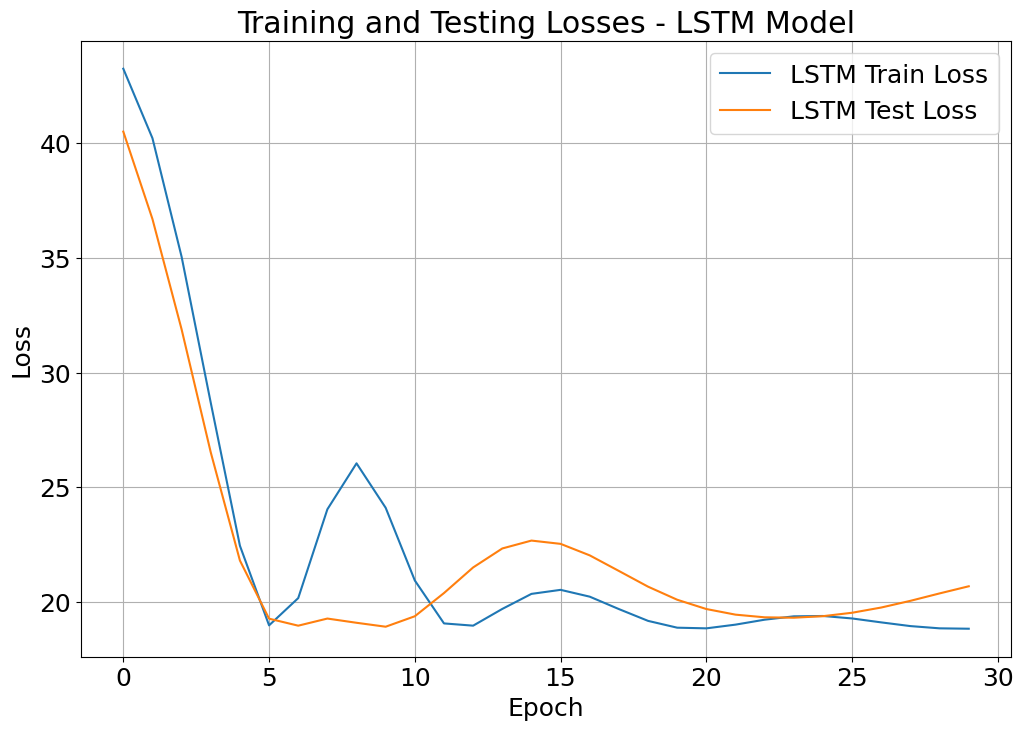

In [9]:
# Train the LSTM model
lstm_model = LSTMModel()
lstm_criterion = nn.MSELoss()
lstm_optimizer = optim.SGD(lstm_model.parameters(), lr=0.01, momentum=0.9)

lstm_losses_train = []
lstm_losses_test = []

X_train_lstm = X_train.unsqueeze(0)  # Add an extra dimension for the sequence length

for epoch in range(30):
    lstm_optimizer.zero_grad()
    outputs = lstm_model(X_train_lstm)
    outputs = outputs.squeeze(0)  # Remove the extra dimension
    loss = lstm_criterion(outputs, y_train)
    loss.backward()
    lstm_optimizer.step()
    lstm_losses_train.append(loss.item())

    with torch.no_grad():
        X_test_lstm = X_test.unsqueeze(0)  # Add an extra dimension for the sequence length
        test_outputs = lstm_model(X_test_lstm)
        test_outputs = test_outputs.squeeze(0)  # Remove the extra dimension
        test_loss = lstm_criterion(test_outputs, y_test)
        lstm_losses_test.append(test_loss.item())

# Plot the training and testing losses for the LSTM model
plt.figure(figsize=(12, 8))
plt.plot(lstm_losses_train, label='LSTM Train Loss')
plt.plot(lstm_losses_test, label='LSTM Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Losses - LSTM Model')
plt.legend()
plt.grid(True)
plt.show()


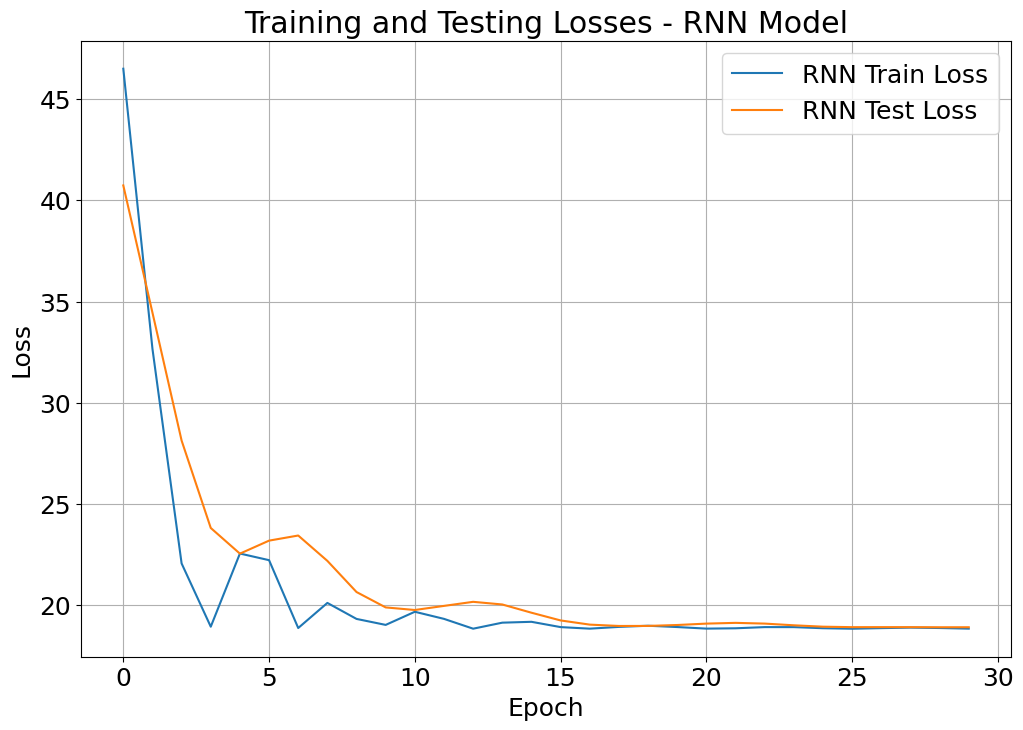

In [26]:
# Train the RNN model
rnn_model = RNNModel()
rnn_criterion = nn.MSELoss()
rnn_optimizer = optim.SGD(rnn_model.parameters(), lr=0.01, momentum=0.9)

rnn_losses_train = []
rnn_losses_test = []

X_train_rnn = X_train.unsqueeze(0)  # Add an extra dimension for the sequence length

for epoch in range(30):
    rnn_optimizer.zero_grad()
    outputs = rnn_model(X_train_rnn)
    outputs = outputs.squeeze(0)  # Remove the extra dimension
    loss = rnn_criterion(outputs, y_train)
    loss.backward()
    rnn_optimizer.step()
    rnn_losses_train.append(loss.item())

    with torch.no_grad():
        X_test_rnn = X_test.unsqueeze(0)  # Add an extra dimension for the sequence length
        test_outputs = rnn_model(X_test_rnn)
        test_outputs = test_outputs.squeeze(0)  # Remove the extra dimension
        test_loss = rnn_criterion(test_outputs, y_test)
        rnn_losses_test.append(test_loss.item())

# Plot the training and testing losses for the RNN model
plt.figure(figsize=(12, 8))
plt.plot(rnn_losses_train, label='RNN Train Loss')
plt.plot(rnn_losses_test, label='RNN Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Losses - RNN Model')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
import numpy as np
from scipy import integrate

# Define ρ values for testing
test_rho_values = [17, 35]

# Define the ESN-based model
class MyESNModel:
    def __init__(self, n_reservoir=100, spectral_radius=0.9, noise=0.01):
        self.n_reservoir = n_reservoir
        self.spectral_radius = spectral_radius
        self.noise = noise

    def train(self, rho):
        # Generate training data
        nn_input, nn_output = generate_lorenz_data(rho)

        # Create and train the ESN
        esn = ESN(n_reservoir=self.n_reservoir, spectral_radius=self.spectral_radius, noise=self.noise)
        esn.fit(nn_input, nn_output)

        return esn

# Function to generate ESN input and output data
def generate_lorenz_data(rho):
    dt = 0.01
    T = 8
    t = np.arange(0, T+dt, dt)
    beta = 8/3
    sigma = 10

    nn_input = np.zeros((100*(len(t)-1), 3))
    nn_output = np.zeros_like(nn_input)

    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    np.random.seed(123)
    x0 = -15 + 30 * np.random.random((100, 3))

    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
                      for x0_j in x0])

    for j in range(100):
        nn_input[j*(len(t)-1):(j+1)*(len(t)-1), :] = x_t[j, :-1, :]
        nn_output[j*(len(t)-1):(j+1)*(len(t)-1), :] = x_t[j, 1:, :]

    return nn_input, nn_output

# Echo State Network implementation
class ESN:
    def __init__(self, n_reservoir=100, spectral_radius=0.9, noise=0.01):
        self.n_reservoir = n_reservoir
        self.spectral_radius = spectral_radius
        self.noise = noise

    def fit(self, input_data, output_data):
        # Reservoir initialization
        np.random.seed(42)
        self.W_in = np.random.rand(self.n_reservoir, input_data.shape[1]) - 0.5
        self.W = np.random.rand(self.n_reservoir, self.n_reservoir) - 0.5
        self.W *= self.spectral_radius / np.max(np.abs(np.linalg.eigvals(self.W)))
        self.X = np.zeros((input_data.shape[0], self.n_reservoir))

        # Training
        for t in range(1, input_data.shape[0]):
            self.X[t] = np.tanh(np.dot(input_data[t], self.W_in.T) + np.dot(self.X[t - 1], self.W))

        # Linear regression
        self.W_out = np.dot(np.linalg.pinv(self.X), output_data)


    def predict(self, input_data):
        predictions = np.zeros((input_data.shape[0], self.W_out.shape[1]))
        x = np.copy(self.X[-1])
        for t in range(input_data.shape[0]):
            x = np.tanh(np.dot(input_data[t], self.W_in.T) + np.dot(x, self.W))
            predictions[t] = np.dot(x, self.W_out)
        return predictions

# Create the ESN-based model instance
esn_model = MyESNModel(n_reservoir=100, spectral_radius=0.9, noise=0.01)

# Test the ESN model for each test ρ value
for rho in test_rho_values:
    print(f"\nTesting for ρ = {rho}...")

    # Generate testing data
    nn_input, nn_output = generate_lorenz_data(rho)

    # Train the ESN
    esn = esn_model.train(rho)

    # Predict using the trained ESN
    predicted_output = esn.predict(nn_input)

    # Compute and print the loss
    loss = np.mean((predicted_output - nn_output) ** 2)
    print(f"Test loss = {loss:.4f}")



Testing for ρ = 17...
Test loss = 0.2574

Testing for ρ = 35...
Test loss = 2.5307
